# Assignment04
* 2019220177 Seungwook Oh

## Initial Setting

### Mount Google Drive

In [57]:
from google.colab import drive
from os.path import join
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [58]:
%cd /content/drive/My\ Drive/MIMP

/content/drive/My Drive/MIMP


### git Setting

In [59]:
!git status

On branch master
Your branch is up to date with 'origin/master'.

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git checkout -- <file>..." to discard changes in working directory)

	modified:   Assignment04/Assignment04.ipynb

no changes added to commit (use "git add" and/or "git commit -a")


In [0]:
!git config --global user.email "sooonchang@gmail.com"
!git config --global user.name "SooonChang"

In [0]:
!git add .
!git commit -m "Assignment04 : Init"
!git push origin master

[master 53f5046] Assignment04 : Init
 1 file changed, 1 insertion(+), 1 deletion(-)
Counting objects: 4, done.
Delta compression using up to 2 threads.
Compressing objects: 100% (4/4), done.
Writing objects: 100% (4/4), 725 bytes | 120.00 KiB/s, done.
Total 4 (delta 2), reused 0 (delta 0)
remote: Resolving deltas: 100% (2/2), completed with 2 local objects.


## 1. Plot the estimated parameters using the training dataset
* plot the extimated parameters ${(\theta_0, \theta_1, \theta_2, \theta_3)}$ at every iteration of gradient descent until convergence
* the color for the parameters ${(\theta_0, \theta_1, \theta2, \theta_3)}$ should be black, red, green, blue, respectively
* the optimization is performed using the training dataset('data_train.csv')

### Import Libraries

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import csv

### Load files

In [0]:
train_x = []
train_y = []
train_z = []
train_h = []

with open('./Assignment04/data_train.csv', newline='') as train_file:
  reader = csv.reader(train_file, delimiter = ',')
  for i in reader:
    train_x.append(i[0]), train_y.append(i[1]), train_z.append(i[2]), train_h.append(i[3])

train_x = np.array(train_x, dtype = np.float64)
train_y = np.array(train_y, dtype = np.float64)
train_z = np.array(train_z, dtype = np.float64)
train_h = np.array(train_h, dtype = np.float64)

train = np.concatenate

test_x = []
test_y = []
test_z = []
test_h = []

with open('./Assignment04/data_test.csv', newline='') as test_file:
  reader = csv.reader(test_file, delimiter = ',')
  for i in reader:
    test_x.append(i[0]), test_y.append(i[1]), test_z.append(i[2]), test_h.append(i[3])

test_x = np.array(test_x, dtype = np.float64)
test_y = np.array(test_y, dtype = np.float64)
test_z = np.array(test_z, dtype = np.float64)
test_h = np.array(test_h, dtype = np.float64)


In [0]:
class Regression:

  def __init__(self, eta = 0.00002, n_iterations = 10000):
    self.eta = eta
    self.n_iterations = n_iterations
  
  def fit(self,x,y,z,h): ## fit model
    self.cost_ = []
    self.w0_ = []
    self.w1_ = []
    self.w2_ = []
    self.w3_ = []

    self.w0 = -1.0
    self.w1 = 1.0
    self.w2 = -1.0
    self.w3 = 1.0

    m = x.shape[0]

    for i in range(self.n_iterations):
      j = self.w0 + self.w1 * x + self.w2*y + self.w3*z
      residuals = j - h

      cost = np.sum((residuals**2))
      cost = cost/(2*m)
      self.cost_.append(cost)
      self.w0_.append(self.w0)
      self.w1_.append(self.w1)
      self.w2_.append(self.w2)
      self.w3_.append(self.w3)

      self.w0 -= (self.eta/m)*np.sum(residuals)
      self.w1 -= (self.eta/m)*np.dot(x.T,residuals)
      self.w2 -= (self.eta/m)*np.dot(y.T,residuals)
      self.w3 -= (self.eta/m)*np.dot(z.T,residuals)

    return self



  def predict(self,x,y,z): ## return predicted

      return self.w0 + self.w1 * x + self.w2*y + self.w3*z
    
  def parameters(self): ## return cost, w0, w1 per iterations

      return self.cost_, self.w0_, self.w1_, self.w2_, self.w3_
  
  def test_error(self,x,y,z,h):
    test_cost_ = []
    m = x.shape[0]

    for i in range(self.n_iterations):
      j = self.w0_[i] + self.w1_[i] * x + self.w2_[i]*y + self.w3_[i]*z
      residuals = j - h
      cost = np.sum((residuals**2))
      cost = cost/(2*m)
      test_cost_.append(cost)
  
    return test_cost_


### Optimize

In [0]:
regress = Regression()
regress.fit(train_x, train_y, train_z, train_h)

In [0]:
cost, w0, w1, w2, w3 = regress.parameters()

### Plot parameters at every iteration

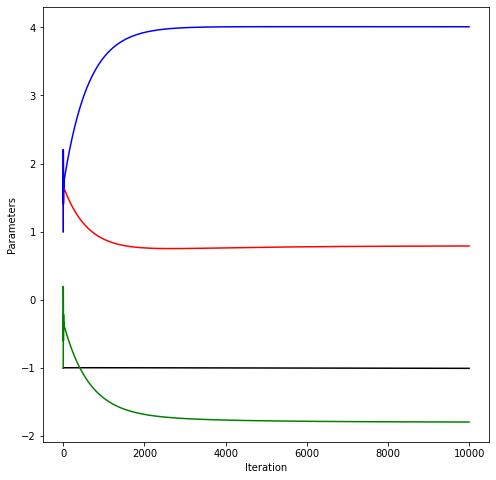

In [0]:
iteration = np.arange(0,10000,1)

plt.figure(figsize = (8,8))
plt.xlabel("Iteration")
plt.ylabel("Parameters")
plt.plot(iteration, w0, c='black')
plt.plot(iteration, w1, c= 'red')
plt.plot(iteration, w2, c= 'green')
plt.plot(iteration, w3, c= 'blue')
plt.show()

### git commit

In [0]:
!git add .
!git commit -m "Assignment04: 1.Plot the estimated parameters using the training dataset"
!git push origin master

[develop 7c88d9a] Assignment04: 1.Plot the estimated parameters using the training dataset
 1 file changed, 1 insertion(+), 1 deletion(-)
Everything up-to-date


## 2. Plot the training error using the training dataset
* plot the training error $J(\theta_0, \theta_1, \theta_2, \theta_3)$ at every iteration of gradient descent until convergence (in blue color)

### plot the training error

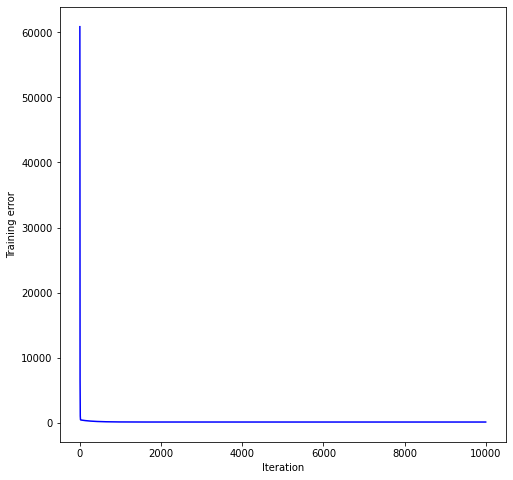

In [0]:
plt.figure(figsize = (8,8))
plt.xlabel("Iteration")
plt.ylabel("Training error")
plt.plot(iteration, cost, c='b')

plt.show()

### git commit

In [0]:
!git add .
!git commit -m "Assignment04: 2. Plot the training error using the training dataset"
!git push origin master

[develop 1f8b7df] Assignment04: 2. Plot the training error using the training dataset
 1 file changed, 1 insertion(+), 1 deletion(-)
 rewrite Assignment04/Assignment04.ipynb (98%)
Everything up-to-date


## 3. Plot the testing error using the testing dataset at every iteration of gradient descent until convergence
* plot the testing error $J(\theta_0, \theta_1, \theta_2, \theta_3)$ at every iteration of gradient descent until convergence (in red color)

In [0]:
test_cost = regress.test_error(test_x,test_y,test_z,test_h)

### plot the test error

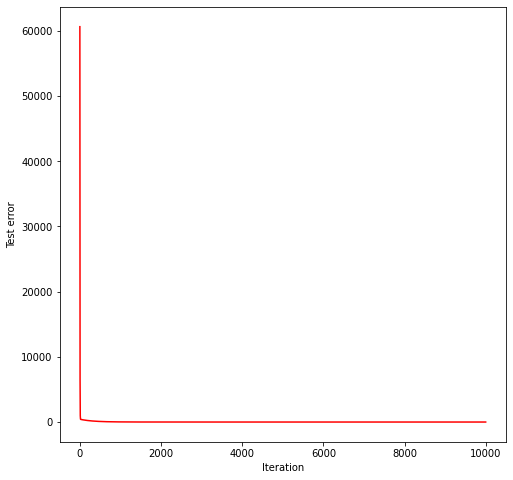

In [0]:
plt.figure(figsize = (8,8))
plt.xlabel("Iteration")
plt.ylabel("Test error")
plt.plot(iteration, test_cost, c='r')

plt.show()

### git commit

In [0]:
!git status
!git add .
!git commit -m "Assignment04: 3.Plot the testing error using the testing dataset at every iteration"
!git push origin master

On branch develop
Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git checkout -- <file>..." to discard changes in working directory)

	modified:   Assignment04/Assignment04.ipynb

no changes added to commit (use "git add" and/or "git commit -a")
[develop 107c665] Assignment04: 3.Plot the testing error using the testing dataset at every iteration
 1 file changed, 1 insertion(+), 1 deletion(-)
 rewrite Assignment04/Assignment04.ipynb (77%)
Everything up-to-date


In [0]:
!git status

On branch master
Your branch is up to date with 'origin/master'.

nothing to commit, working tree clean


In [53]:
!git push origin master

Everything up-to-date


In [0]:
!git add .

In [55]:
!git commit -m "error"

[master 3e410c9] error
 1 file changed, 1 insertion(+), 1 deletion(-)
 rewrite Assignment04/Assignment04.ipynb (98%)


In [56]:
!git push origin master

Counting objects: 4, done.
Delta compression using up to 2 threads.
Compressing objects: 100% (4/4), done.
Writing objects: 100% (4/4), 31.50 KiB | 3.50 MiB/s, done.
Total 4 (delta 1), reused 0 (delta 0)
remote: Resolving deltas: 100% (1/1), completed with 1 local object.
To https://github.com/SooonChang/MIMP
   bd1e2d4..3e410c9  master -> master
